## Importing python library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
bankruptcy= pd.read_csv("data.csv")

## Information about the dataset

In [3]:
bankruptcy.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Finding null values

In [5]:
bankruptcy.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

## Data visualisation

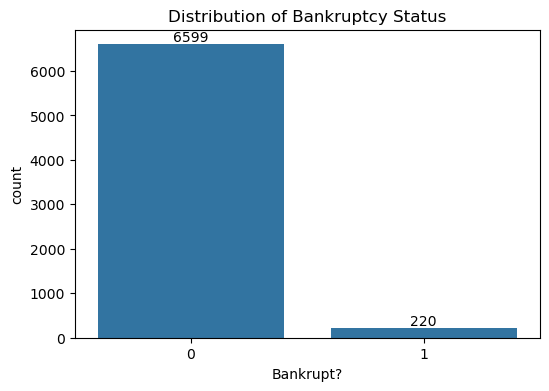

In [6]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Bankrupt?', data=bankruptcy)
plt.title("Distribution of Bankruptcy Status")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom', fontsize=10)
plt.show()

In [7]:
bankruptcy.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


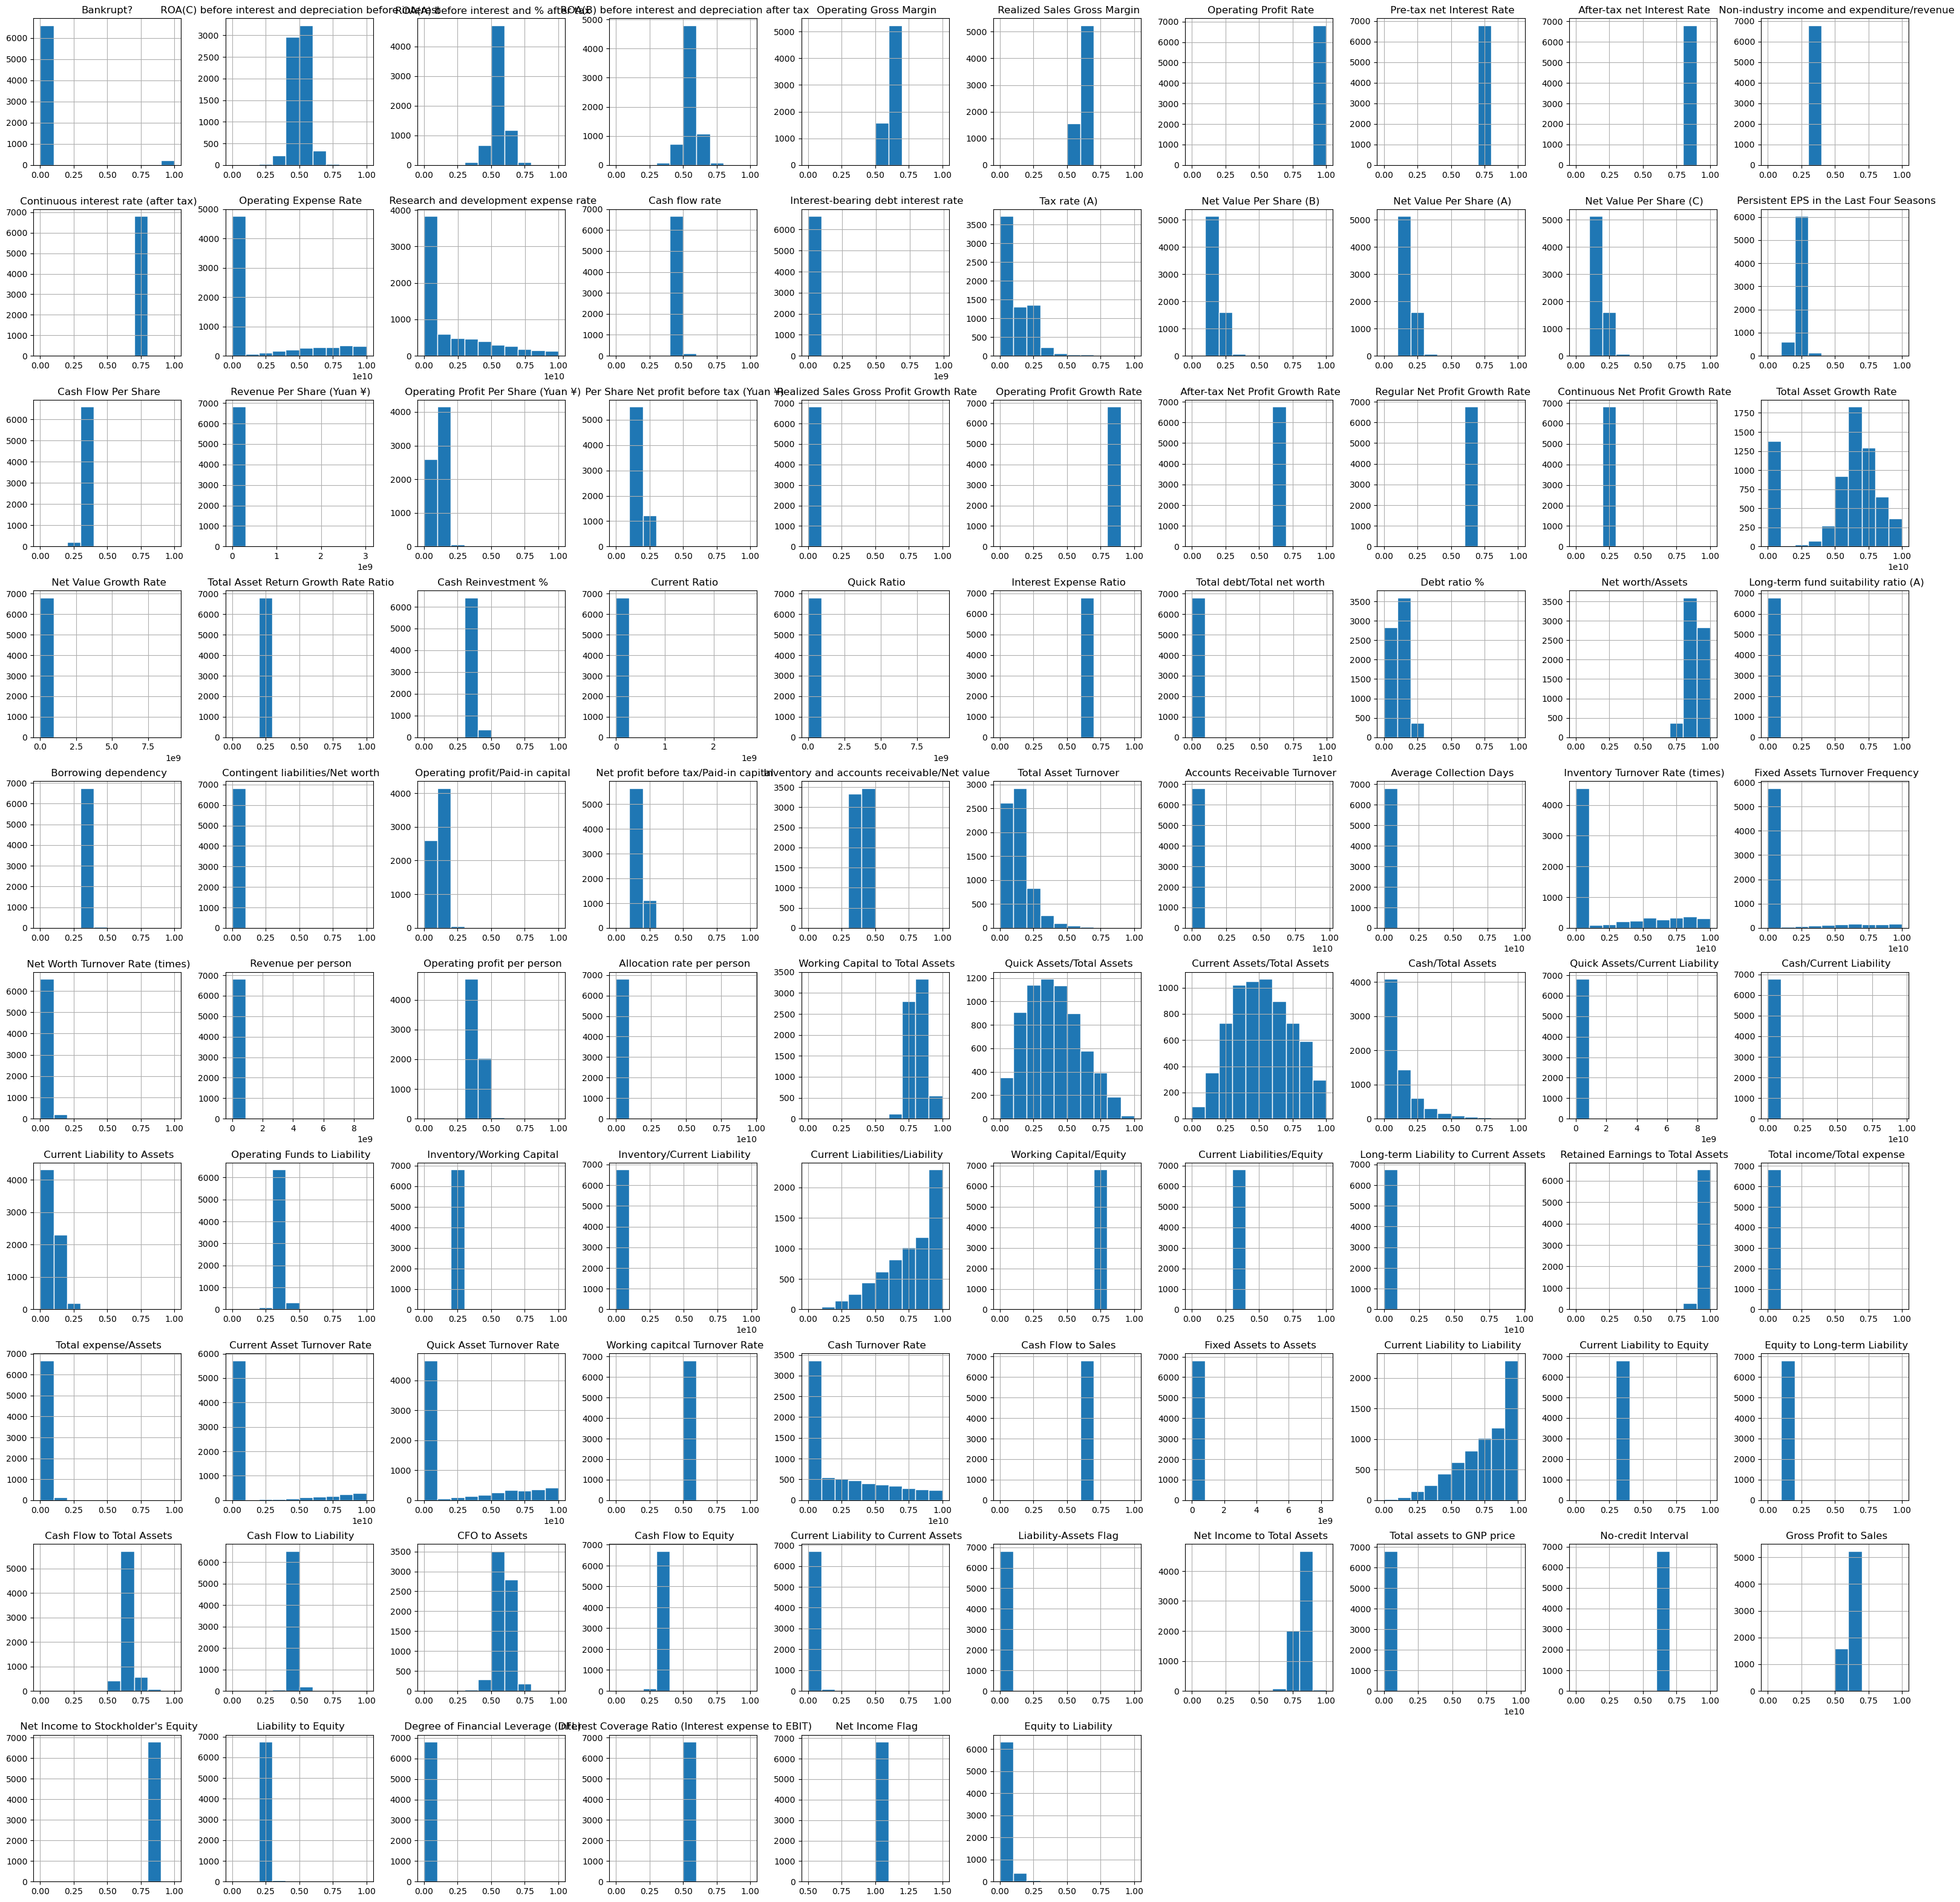

In [8]:
bankruptcy.hist(figsize=(40,40), edgecolor='white')
plt.show()

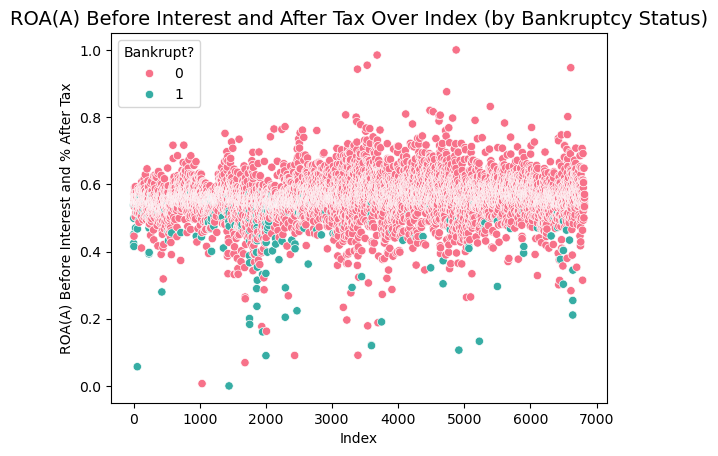

In [9]:
sns.scatterplot(data=bankruptcy,x=bankruptcy.index,y=' ROA(A) before interest and % after tax',
                hue='Bankrupt?', palette='husl')
plt.title('ROA(A) Before Interest and After Tax Over Index (by Bankruptcy Status)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('ROA(A) Before Interest and % After Tax')
plt.legend(title='Bankrupt?')
plt.show()

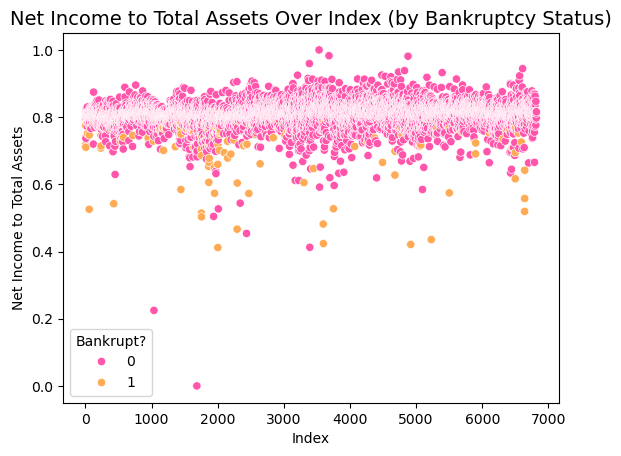

In [10]:
sns.scatterplot(data=bankruptcy,x=bankruptcy.index,y=' Net Income to Total Assets',
                hue='Bankrupt?', palette='spring')
plt.title('Net Income to Total Assets Over Index (by Bankruptcy Status)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Net Income to Total Assets')
plt.legend(title='Bankrupt?')
plt.show()

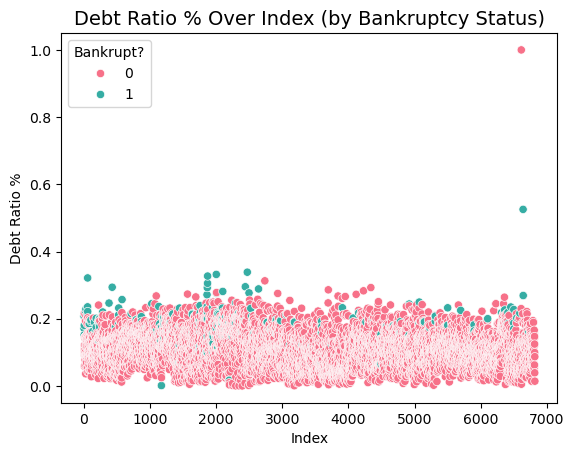

In [11]:
sns.scatterplot(data=bankruptcy,x=bankruptcy.index,y=' Debt ratio %',
                hue='Bankrupt?', palette='husl')
plt.title('Debt Ratio % Over Index (by Bankruptcy Status)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Debt Ratio %')
plt.legend(title='Bankrupt?')
plt.show()

## Correlation analysis

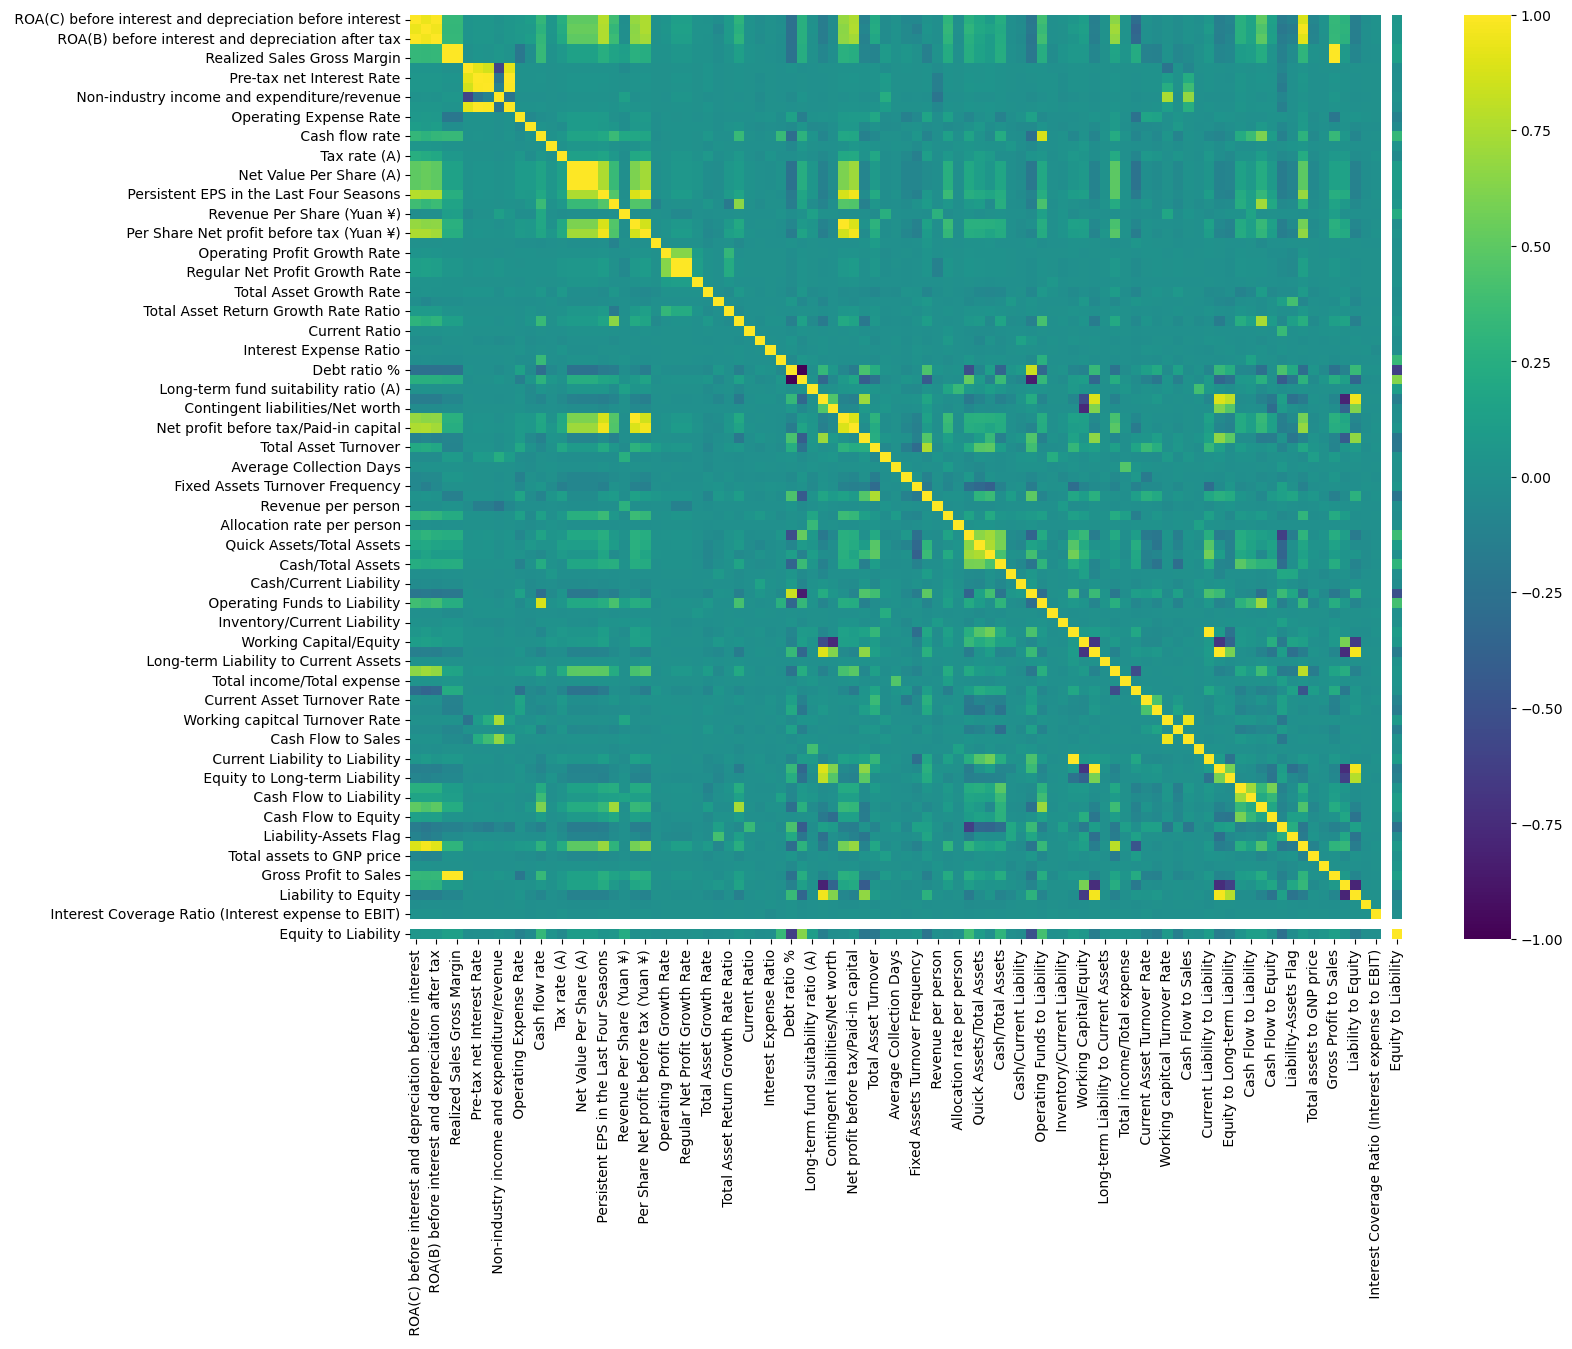

In [12]:
plt.figure(figsize = (16, 12))
sns.heatmap(bankruptcy[bankruptcy.columns[1:]].corr(),
            cmap='viridis', linewidths= 0, annot = False)
plt.show()

In [13]:
bankruptcy.corr()['Bankrupt?']

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Name: Bankrupt?, Length: 96, dtype: float64

## Finding the input features that have positive correlation

In [14]:
target_variable = 'Bankrupt?'
# Calculating the correlation matrix
correlation_matrix = bankruptcy.corr()
target_correlations_bankruptcy = correlation_matrix[target_variable].abs().sort_values(ascending=False)
# Removing the target variable itself from the list
target_correlations_bankruptcy = target_correlations_bankruptcy.drop(target_variable)
# Selecting features with absolute correlation >= 0.1
selected_features_bankruptcy = target_correlations_bankruptcy[target_correlations_bankruptcy >= 0.1]
print("Features with absolute correlation >= 0.1 with 'Bankrupt?':")
print(selected_features_bankruptcy)
print(f"\nNumber of selected features: {len(selected_features_bankruptcy)}")

Features with absolute correlation >= 0.1 with 'Bankrupt?':
Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                                    

In [15]:
# Creating a new dataframe with selected features
selected_columns = list(selected_features_bankruptcy.index)
bankruptcy_selected = bankruptcy[selected_columns]
print("\nShape of the new dataframe with selected features:")
print(bankruptcy_selected.shape)


Shape of the new dataframe with selected features:
(6819, 32)


## Class balancing

In [16]:
from imblearn.under_sampling import RandomUnderSampler
X = bankruptcy_selected
y = bankruptcy['Bankrupt?']
rus_bankruptcy = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus_bankruptcy.fit_resample(X, y)
downsampled_bankruptcy = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Bankrupt?'])], axis=1)

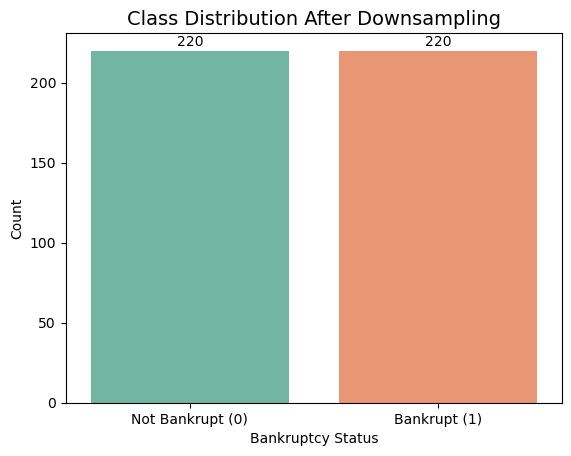

In [17]:
ax =sns.countplot(x='Bankrupt?', data=downsampled_bankruptcy, palette='Set2')
plt.title('Class Distribution After Downsampling', fontsize=14)
plt.xlabel('Bankruptcy Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Bankrupt (0)', 'Bankrupt (1)'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom', fontsize=10)
plt.show()

## Data split

In [18]:
from sklearn.model_selection import train_test_split
x_bankruptcy = downsampled_bankruptcy.drop(columns= 'Bankrupt?')
y_bankruptcy = downsampled_bankruptcy['Bankrupt?']
x_train, x_test, y_train, y_test = train_test_split(x_bankruptcy, y_bankruptcy, test_size=0.25, random_state=42)

## XGBoost classifier

In [19]:
xgb_model_bankruptcy = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_bankruptcy.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
y_pred_xgb = xgb_model_bankruptcy.predict(x_test)

In [21]:
print("Accuracy of XGBoost:", accuracy_score(y_test, y_pred_xgb))

Accuracy of XGBoost: 0.8363636363636363


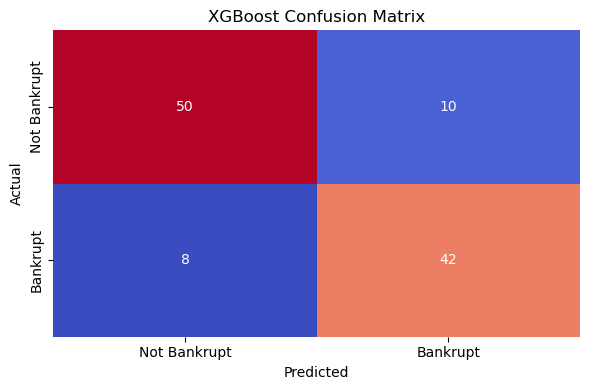

In [22]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Not Bankrupt', 'Bankrupt'],
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()

In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        60
           1       0.81      0.84      0.82        50

    accuracy                           0.84       110
   macro avg       0.83      0.84      0.84       110
weighted avg       0.84      0.84      0.84       110



## Random forest classifier

In [24]:
rf_model_bankruptcy = RandomForestClassifier(random_state=42)
rf_model_bankruptcy.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred_rf = rf_model_bankruptcy.predict(x_test)

In [26]:
print("Accuracy of RF:", accuracy_score(y_test, y_pred_rf))

Accuracy of RF: 0.8545454545454545


In [27]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        60
           1       0.81      0.88      0.85        50

    accuracy                           0.85       110
   macro avg       0.85      0.86      0.85       110
weighted avg       0.86      0.85      0.85       110



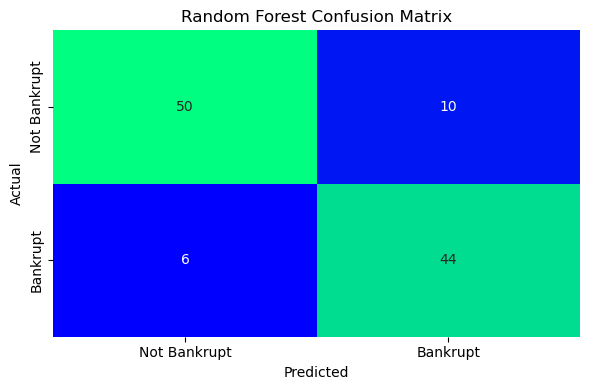

In [28]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='winter', cbar=False,
            xticklabels=['Not Bankrupt', 'Bankrupt'],
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

## Logistic regression

In [29]:
logreg_model_bankruptcy = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_bankruptcy.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
y_pred_logreg = logreg_model_bankruptcy.predict(x_test)

In [31]:
print("Accuracy of Logistic regression:", accuracy_score(y_test, y_pred_logreg))

Accuracy of Logistic regression: 0.8727272727272727


In [32]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        60
           1       0.82      0.92      0.87        50

    accuracy                           0.87       110
   macro avg       0.87      0.88      0.87       110
weighted avg       0.88      0.87      0.87       110



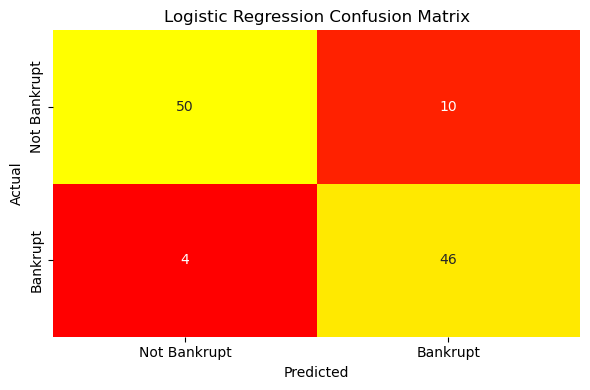

In [33]:
# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
# Plot 
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='autumn', cbar=False,
            xticklabels=['Not Bankrupt', 'Bankrupt'],
            yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()

## Accuracy comparison

In [34]:
accuracy_scores = {
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg)
}

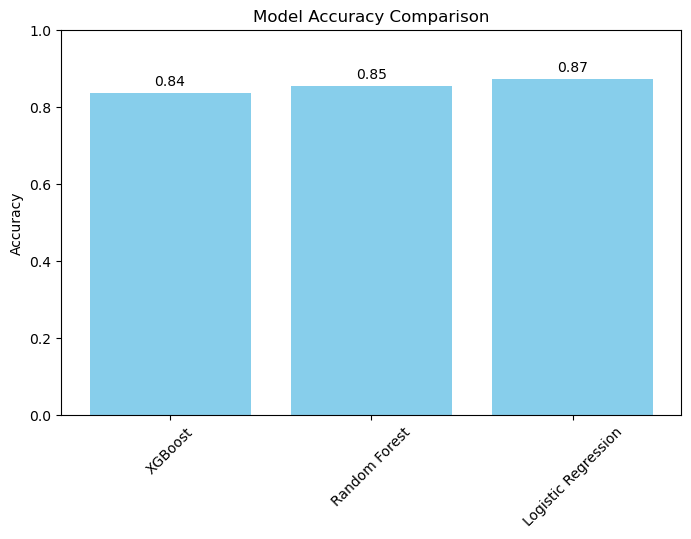

In [35]:
plt.figure(figsize=(8, 5))
bars =plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
plt.show()

## Logistic Regression + SHAP

In [36]:
import shap
explainer = shap.LinearExplainer(logreg_model_bankruptcy, x_train)
shap_values = explainer.shap_values(x_test)

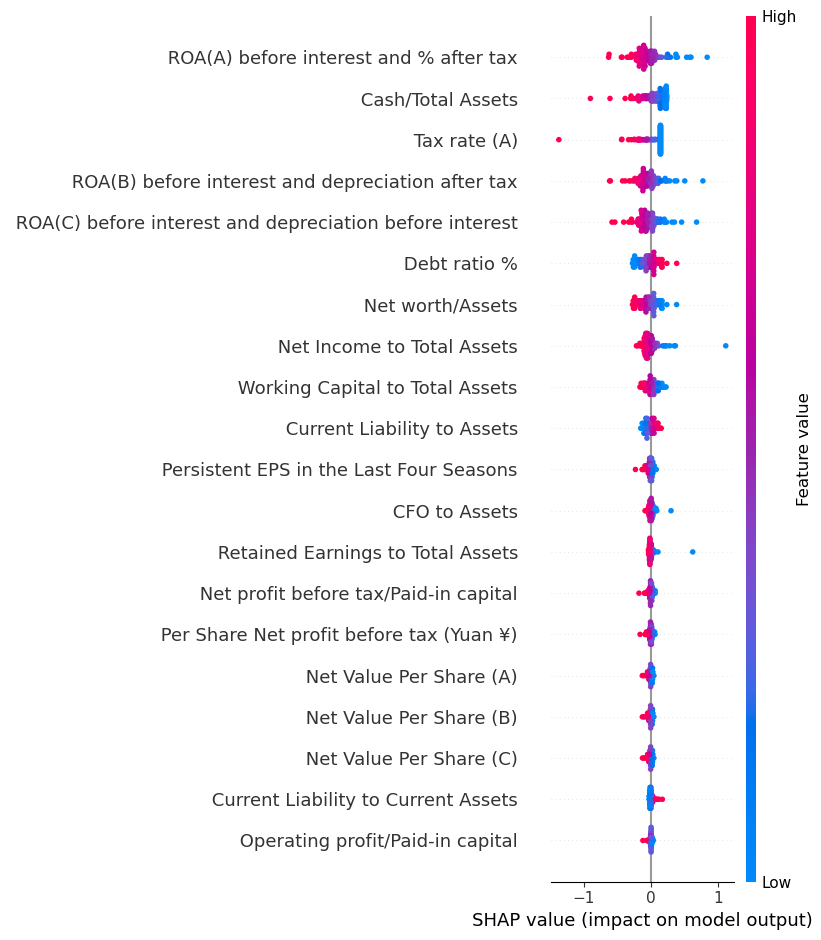

In [37]:
shap.summary_plot(shap_values, x_test)

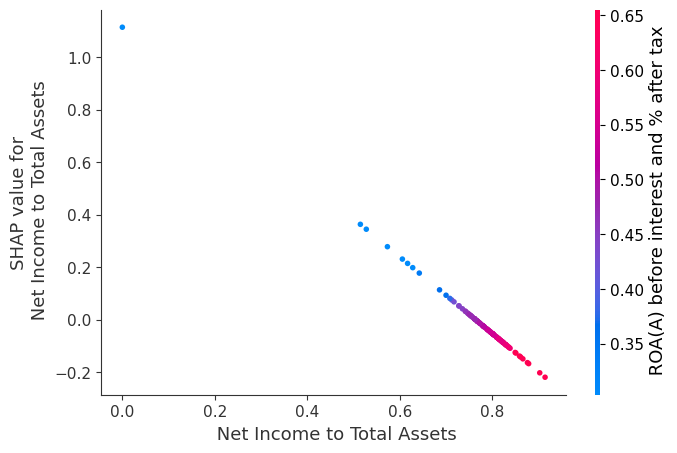

In [38]:
shap.dependence_plot(' Net Income to Total Assets', shap_values, x_test)